## Ляхов Артём Андреевич БПМ214 Вариант 19

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Задание 1

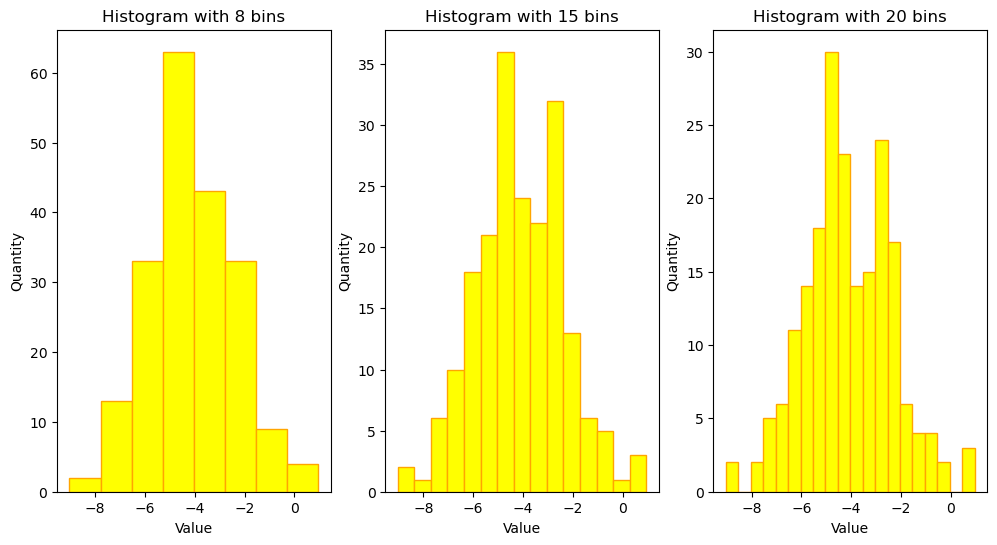

In [2]:
n = 200
alpha = -4
teta = 8
var = 0.5 * teta - 1

np.random.seed(1_000)

#Sample modeling
arr1 = np.random.normal(alpha, np.sqrt(var), n)

#Hist
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

axes[0].hist(x=arr1, color='yellow', edgecolor='orange', bins=8)
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Quantity')
axes[0].set_title('Histogram with 8 bins')

axes[1].hist(x=arr1, color='yellow', edgecolor='orange', bins=15)
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Quantity')
axes[1].set_title('Histogram with 15 bins')

axes[2].hist(x=arr1, color='yellow', edgecolor='orange', bins=20)
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Quantity')
axes[2].set_title('Histogram with 20 bins')

plt.savefig(fname='task1.pdf', format='pdf')
plt.show()

## Задание 2.1

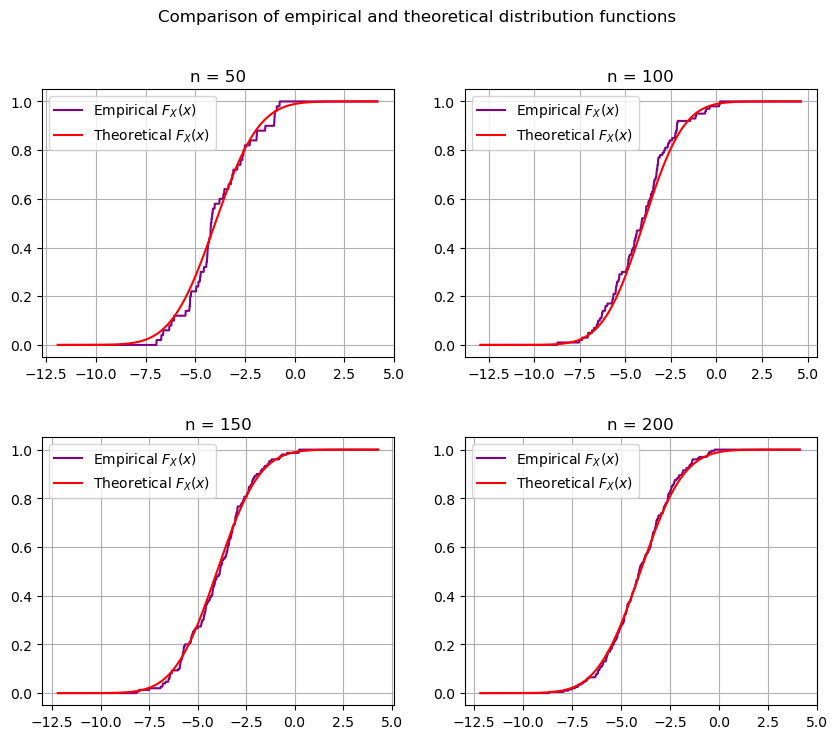

In [3]:
np.random.seed(40_200)

n_list = [50, 100, 150, 200]
arr_list = []

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Comparison of empirical and theoretical distribution functions')

for i in range(len(n_list)):
    n = n_list[i]
    
    arr2 = np.random.normal(alpha, np.sqrt(var), n)
    arr_list.append(arr2)
    
    exp_est = np.mean(arr2)
    var_est = 1/(n - 1) * np.sum((arr2 - np.mean(arr2)) ** 2)
    sigma_est = np.sqrt(var_est)
    
    x_arr = np.linspace(exp_est - 5 * sigma_est, exp_est + 5 * sigma_est, 1_000, endpoint = True)
    y_emp = np.array([], dtype='float64')
    
    for x in x_arr:
        value_in_x = np.where(arr2 < x)[0].shape[0]/n
        y_emp = np.append(y_emp, [value_in_x])
    
    x_ticks = np.arange(-12.5, 6, 2.5)
    
    axes[i // 2, i % 2].plot(x_arr, y_emp, 'purple', label = 'Empirical $F_X(x)$')
    axes[i // 2, i % 2].plot(x_arr, norm.cdf(x_arr, alpha, np.sqrt(var)), 'red', label= 'Theoretical $F_X(x)$')
    axes[i // 2, i % 2].set_xticks(x_ticks)
    axes[i // 2, i % 2].grid(ls = '-')
    axes[i // 2, i % 2].legend(loc='upper left')
    axes[i // 2, i % 2].set_title(f'n = {n}')
    
plt.subplots_adjust(hspace = 0.3)
plt.savefig(fname='task2_a.pdf', format='pdf')
plt.show()

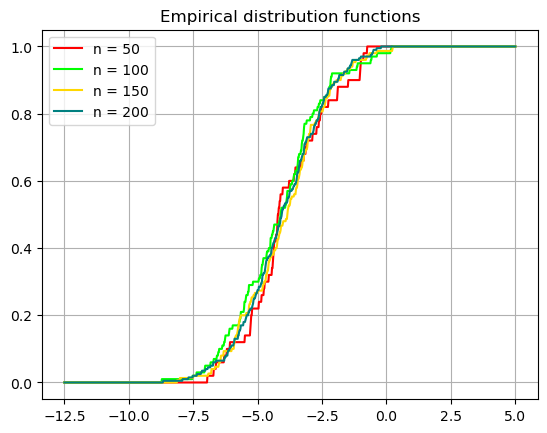

In [4]:
colors = {0:'red', 1:'lime', 2:'gold', 3:'teal'}

x_list = np.linspace(-12.5, 5.0, 1_000)

for i in range(len(arr_list)):
    n = arr_list[i].shape[0]
    y_list = np.array([], dtype='float64')
    
    for x in x_list:
        value_in_x = np.where(arr_list[i] < x)[0].shape[0]/n
        y_list = np.append(y_list, [value_in_x])
    
    plt.plot(x_list, y_list, colors[i], label = f'n = {n}')
    

plt.grid(ls = '-')
plt.title("Empirical distribution functions")
plt.legend(loc = 'upper left')
plt.savefig(fname='task2_b.pdf', format='pdf')
plt.show()

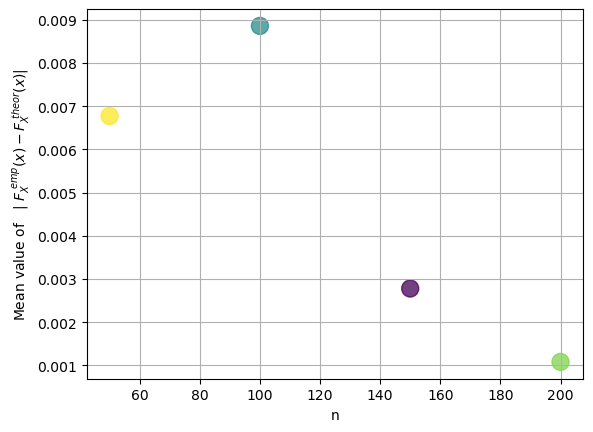

In [5]:
np.random.seed(1_000_000)

#List with mean differences between empirical and theoretical distribution functions for different n values
diff_list = []

for i in range(len(arr_list)):
    n = arr_list[i].shape[0]
    y_list = np.array([], dtype='float64')
    
    for x in x_list:
        value_in_x = np.where(arr_list[i] < x)[0].shape[0]/n
        y_list = np.append(y_list, [value_in_x])
    
    diff_list.append(np.abs(np.mean(y_list -  norm.cdf(x_list, alpha, np.sqrt(var)))))

x_ticks = np.arange(40, 220, 20)
    
c = np.random.rand(len(n_list))
s = len(n_list) * [150]

plt.xlabel('n')
plt.ylabel('Mean value of   | $F_X^{\ emp}(x) - F_X^{\ theor}(x)$|')
plt.xticks(x_ticks)
plt.scatter(n_list, diff_list, s=s, c=c, alpha=0.75)
plt.grid(ls='-')
plt.savefig(fname='task2_c.pdf', format='pdf')
plt.show()